In [1]:
import rebound
import numpy as np

In [4]:
%%time

date = "2020-06-01 14:00"
sim = rebound.Simulation()
sim.add("Sun", date=date)
sim.add("Mercury", date=date)
sim.add("Venus", date=date)
sim.add("Earth", date=date)
sim.add("Mars", date=date)
sim.add("Jupiter", date=date)
sim.add("Saturn", date=date)
sim.add("Uranus", date=date)
sim.add("Neptune", date=date)
sim.save('solarsystem.bin')

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
CPU times: user 325 ms, sys: 45.4 ms, total: 370 ms
Wall time: 1min 8s


In [17]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-4, P=1)
sim.add(m=1.e-4, P=1.3)
sim.add(m=1.e-4, P=1.6)
for p in sim.particles[1:]:
    p.r = p.a*(p.m/3)**(1/3)
sim.move_to_com()
sim.collision='line'
sim.integrator="whfast"
sim.dt = 0.05
sim.save('unstable.bin')

In [70]:
sim = rebound.Simulation('unstable.bin')
sim.integrate(1.e4)

Collision: Two particles collided (d < r1+r2)

In [27]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-7, P=1)
sim.add(m=1.e-7, P=2.1)
sim.add(m=1.e-7, P=4.5)
for p in sim.particles[1:]:
    p.r = p.a*(p.m/3)**(1/3)
sim.move_to_com()
sim.collision='line'
sim.integrator="whfast"
sim.dt = 0.05
sim.save('longstable.bin')

In [28]:
sim = rebound.Simulation('longstable.bin')
sim.integrate(1.e4)

In [44]:
from spock.simsetup import set_timestep
def makesim(e, whfast):
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1.e-7, P=1, e=e)
    sim.add(m=1.e-7, P=1.3, e=e, pomega=np.pi)
    sim.add(m=1.e-7, P=1.7, e=e)
    if whfast == True:
        sim.integrator="whfast"
        set_timestep(sim, dtfrac=0.05)
    for p in sim.particles[1:]:
        p.r = p.a*(p.m/3)**(1/3)
    sim.move_to_com()
    return sim

In [60]:
%%time
import time
iastimes, whfasttimes = [], []
es = [1-e for e in np.logspace(-2, -1, 5)]
for e in es:
    t0 = time.time()
    sim = makesim(e, whfast=True)
    sim.integrate(1e4)
    whfasttimes.append(time.time()-t0)
    t0 = time.time()
    sim = makesim(e, whfast=False)
    sim.integrate(1e4)
    iastimes.append(time.time()-t0)

CPU times: user 9min 43s, sys: 209 ms, total: 9min 44s
Wall time: 9min 44s


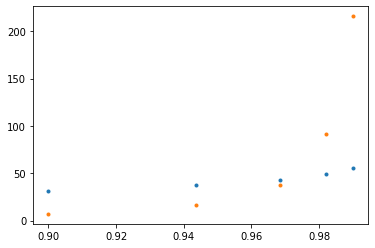

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(es, iastimes, '.')
ax.plot(es, whfasttimes, '.')